# Getting the Dataset

In [1]:
# Import libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset, unmodified original dataset is uploaded to the provided Github link.

url = "https://raw.githubusercontent.com/JamesShen03/3401/main/FinalAssignment/Airlines.csv"
flights = pd.read_csv(url, sep=',')

# Create backup copy of the dataset
flights_backup = flights

# Quick look at the Data

In [3]:
flights

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1


In [4]:
flights.head()

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0


In [5]:
flights.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.000000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.604461,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.000000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.500000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.000000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.500000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.000000,7814.000000,7.000000,1439.000000,655.000000,1.000000


In [6]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539383 entries, 0 to 539382
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           539383 non-null  int64 
 1   Airline      539383 non-null  object
 2   Flight       539383 non-null  int64 
 3   AirportFrom  539383 non-null  object
 4   AirportTo    539383 non-null  object
 5   DayOfWeek    539383 non-null  int64 
 6   Time         539383 non-null  int64 
 7   Length       539383 non-null  int64 
 8   Delay        539383 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 37.0+ MB


In [7]:
flights.duplicated().sum()

0

In [8]:
flights.isna().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [9]:
flights.columns

Index(['id', 'Airline', 'Flight', 'AirportFrom', 'AirportTo', 'DayOfWeek',
       'Time', 'Length', 'Delay'],
      dtype='object')

In [10]:
flights.dtypes

id              int64
Airline        object
Flight          int64
AirportFrom    object
AirportTo      object
DayOfWeek       int64
Time            int64
Length          int64
Delay           int64
dtype: object

In [11]:
flights.drop(['id'],axis=1,inplace=True)

# EDA

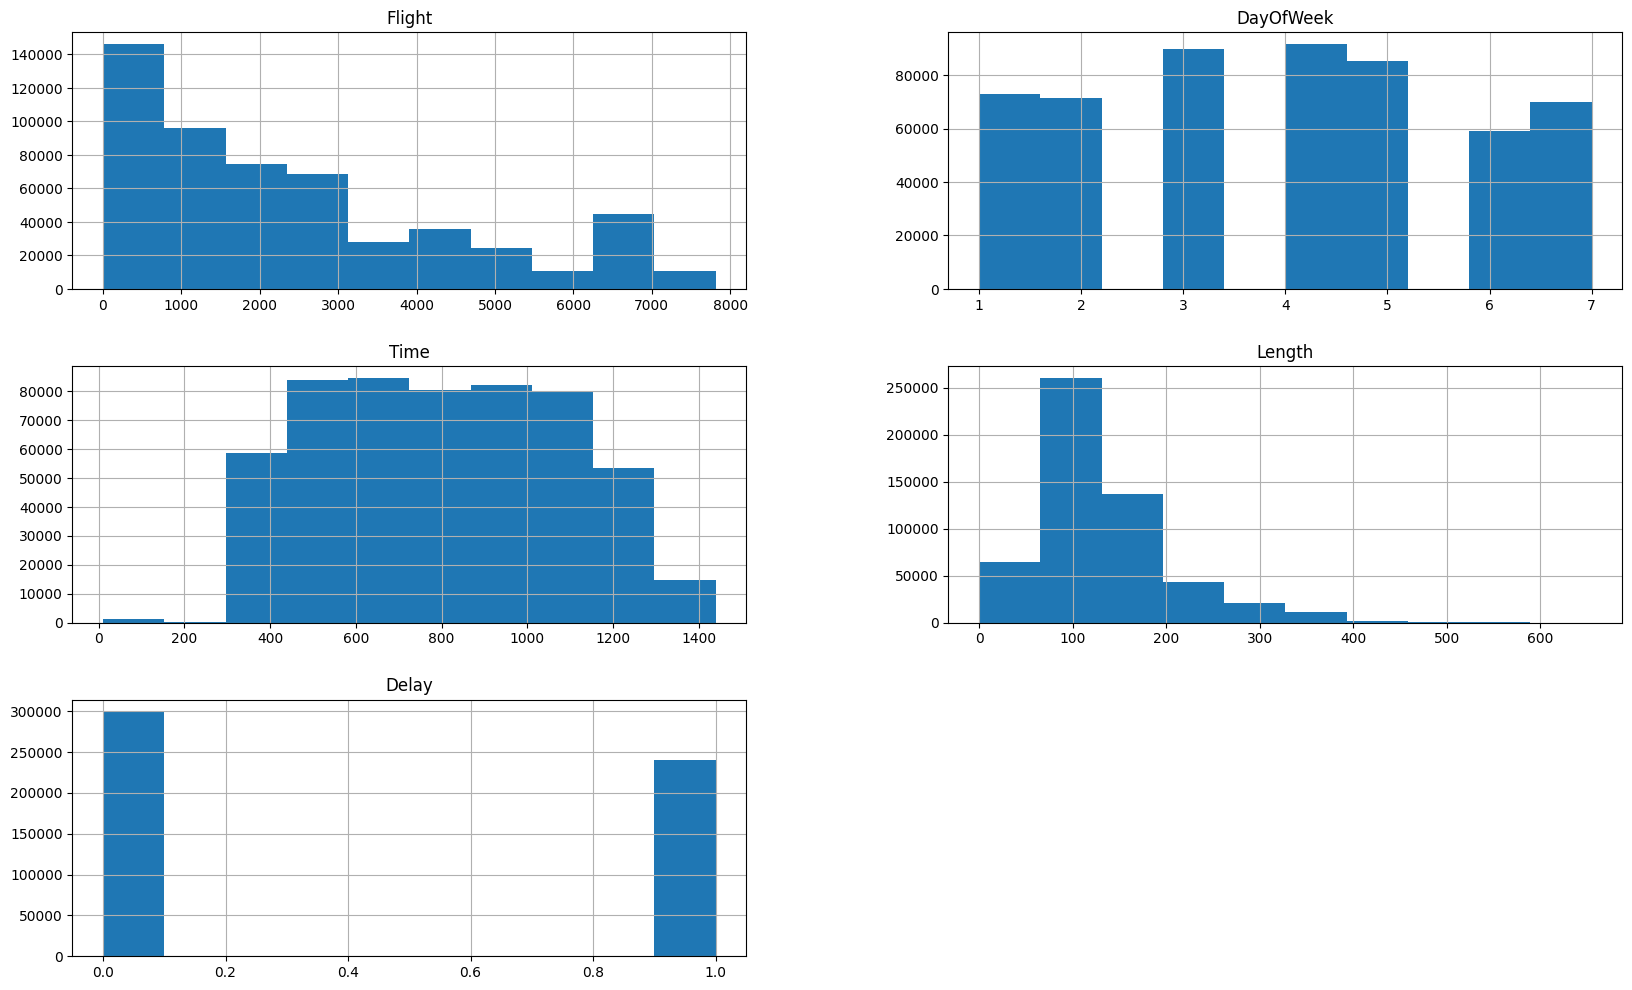

In [12]:
flights.hist(figsize=(20, 12))
plt.show()

In [13]:
#Correlation matrix of numerical attributes.
corr_matrix=flights[['Flight','DayOfWeek','Time','Length','Delay']].corr()
corr_matrix

,Flight,DayOfWeek,Time,Length,Delay
Flight,1.000000,0.000416,-0.005750,-0.341481,-0.046175
DayOfWeek,0.000416,1.000000,0.001273,0.013397,-0.026199
Time,-0.005750,0.001273,1.000000,-0.020612,0.150454
Length,-0.341481,0.013397,-0.020612,1.000000,0.040489
Delay,-0.046175,-0.026199,0.150454,0.040489,1.000000


In [14]:
#Ranking based on correlation with Delay.
corr_matrix["Delay"].sort_values(ascending=False)

Delay        1.000000
Time         0.150454
Length       0.040489
DayOfWeek   -0.026199
Flight      -0.046175
Name: Delay, dtype: float64

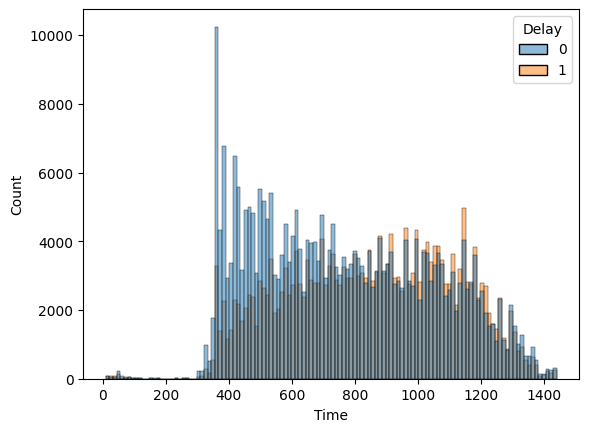

In [15]:
TimevsDelay = sns.histplot(x='Time', hue='Delay', data=flights)

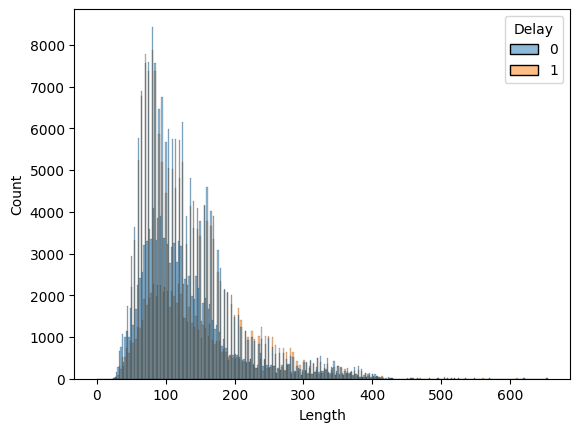

In [16]:
LengthvsDelay = sns.histplot(x='Length', hue='Delay', data=flights)

<Axes: xlabel='Airline', ylabel='count'>

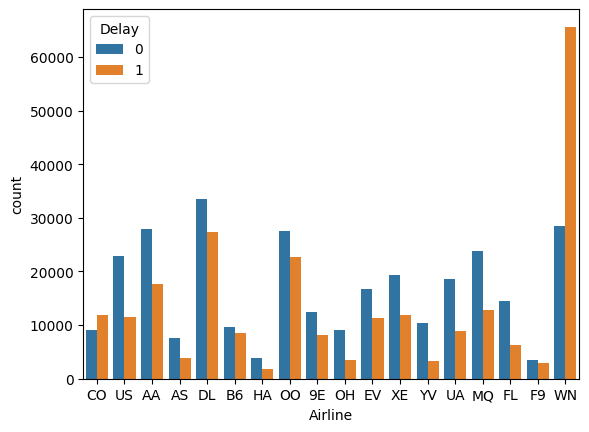

In [17]:
sns.countplot(x='Airline', hue='Delay', data=flights)

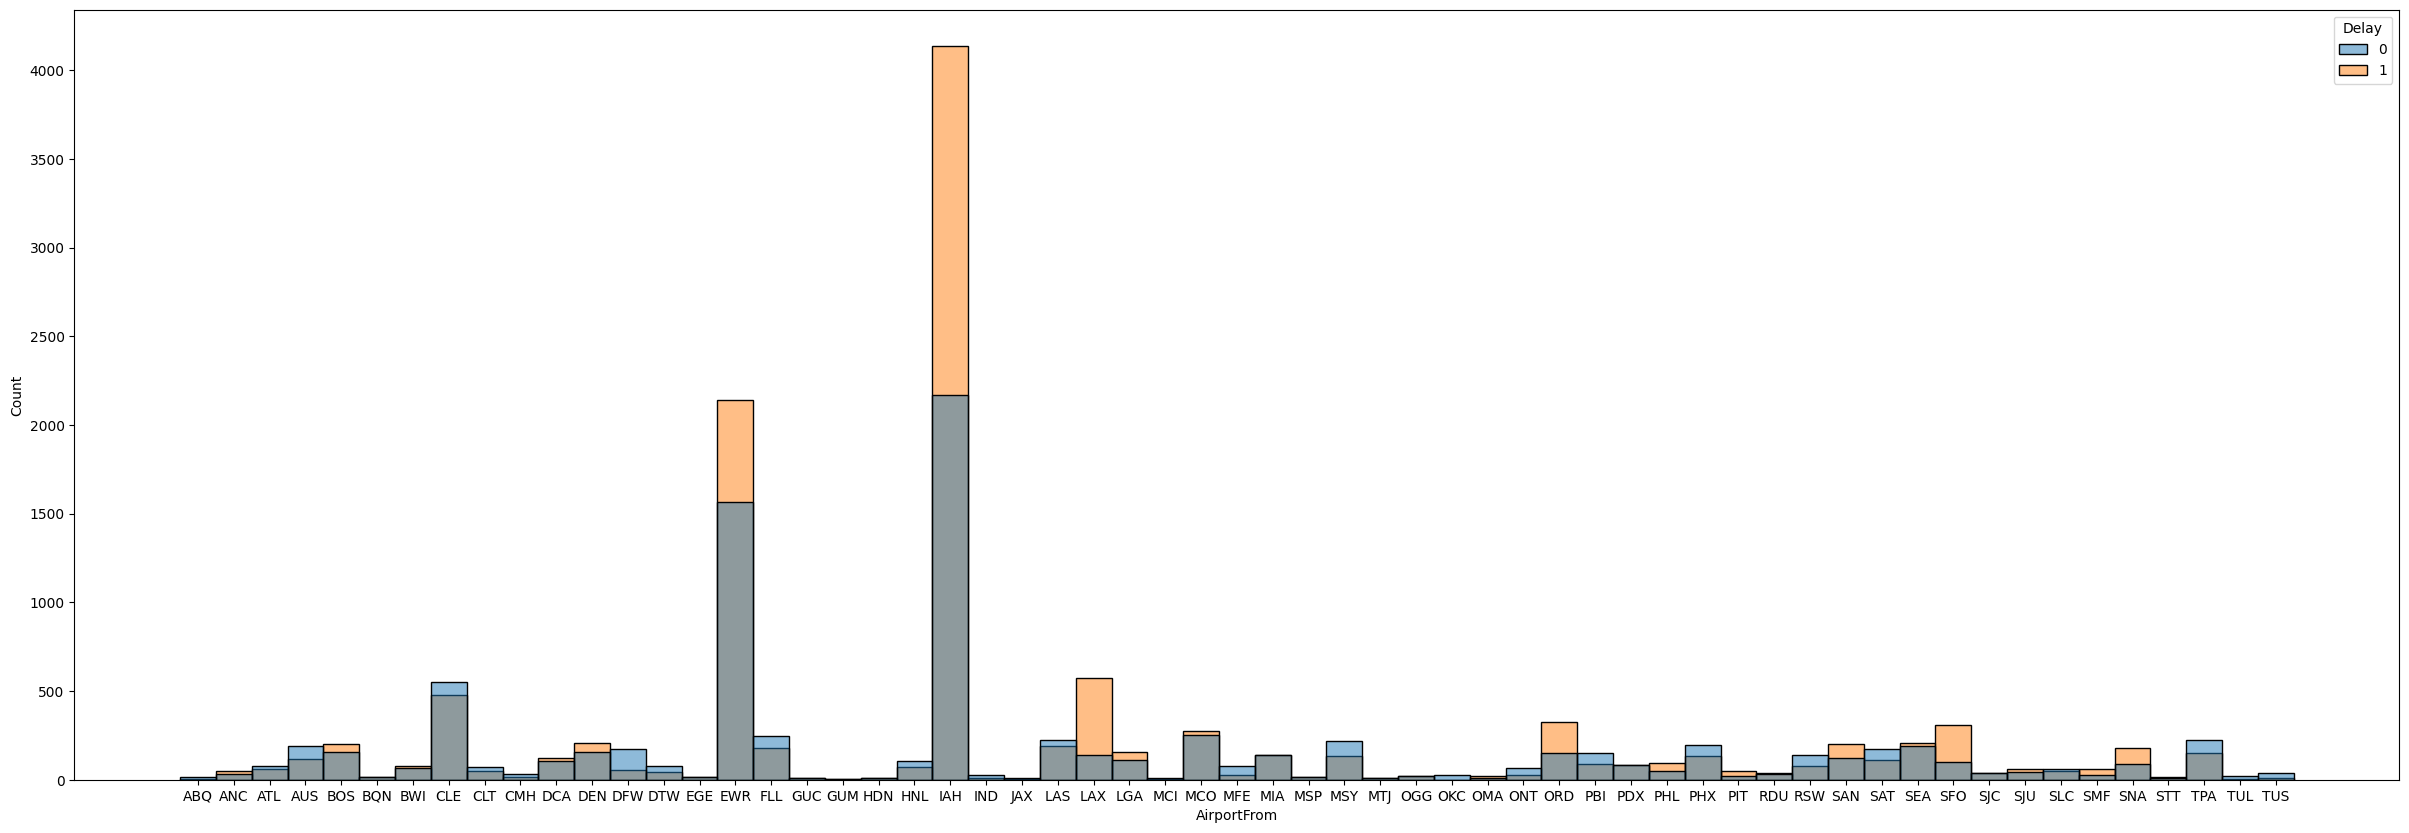

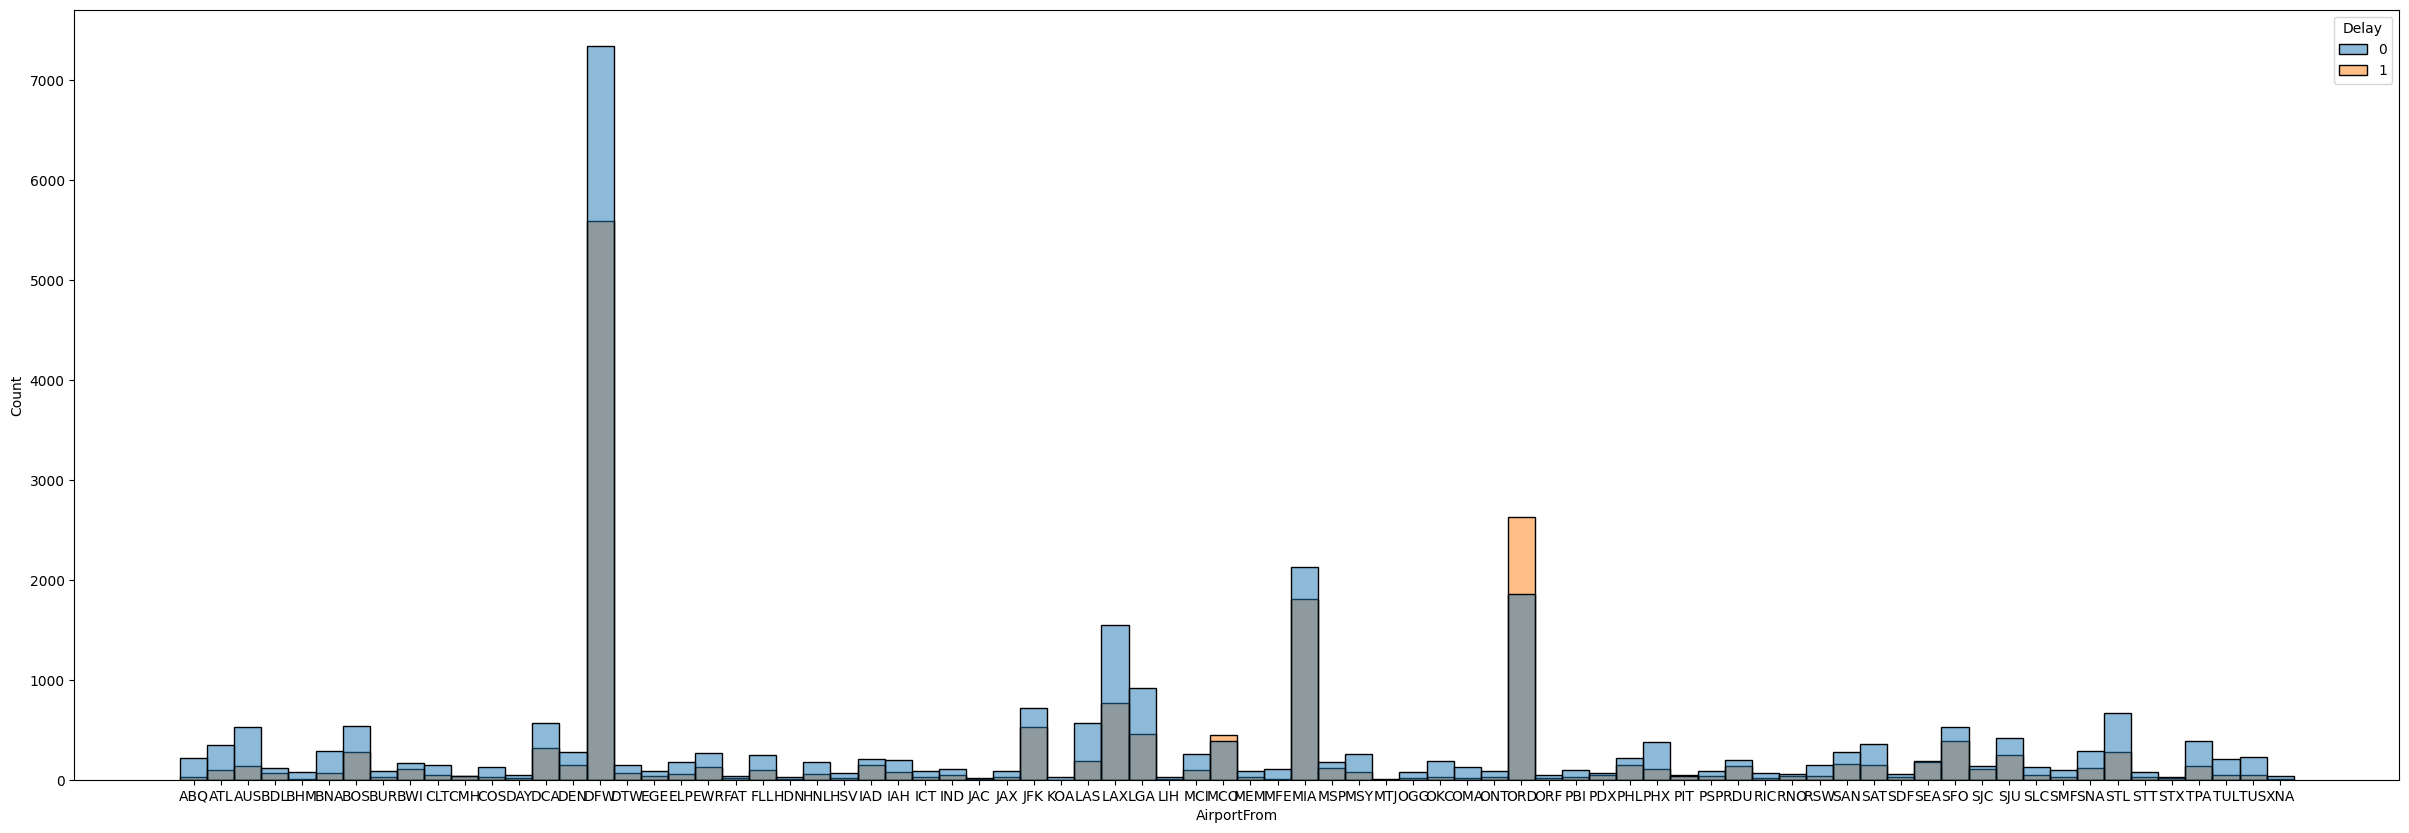

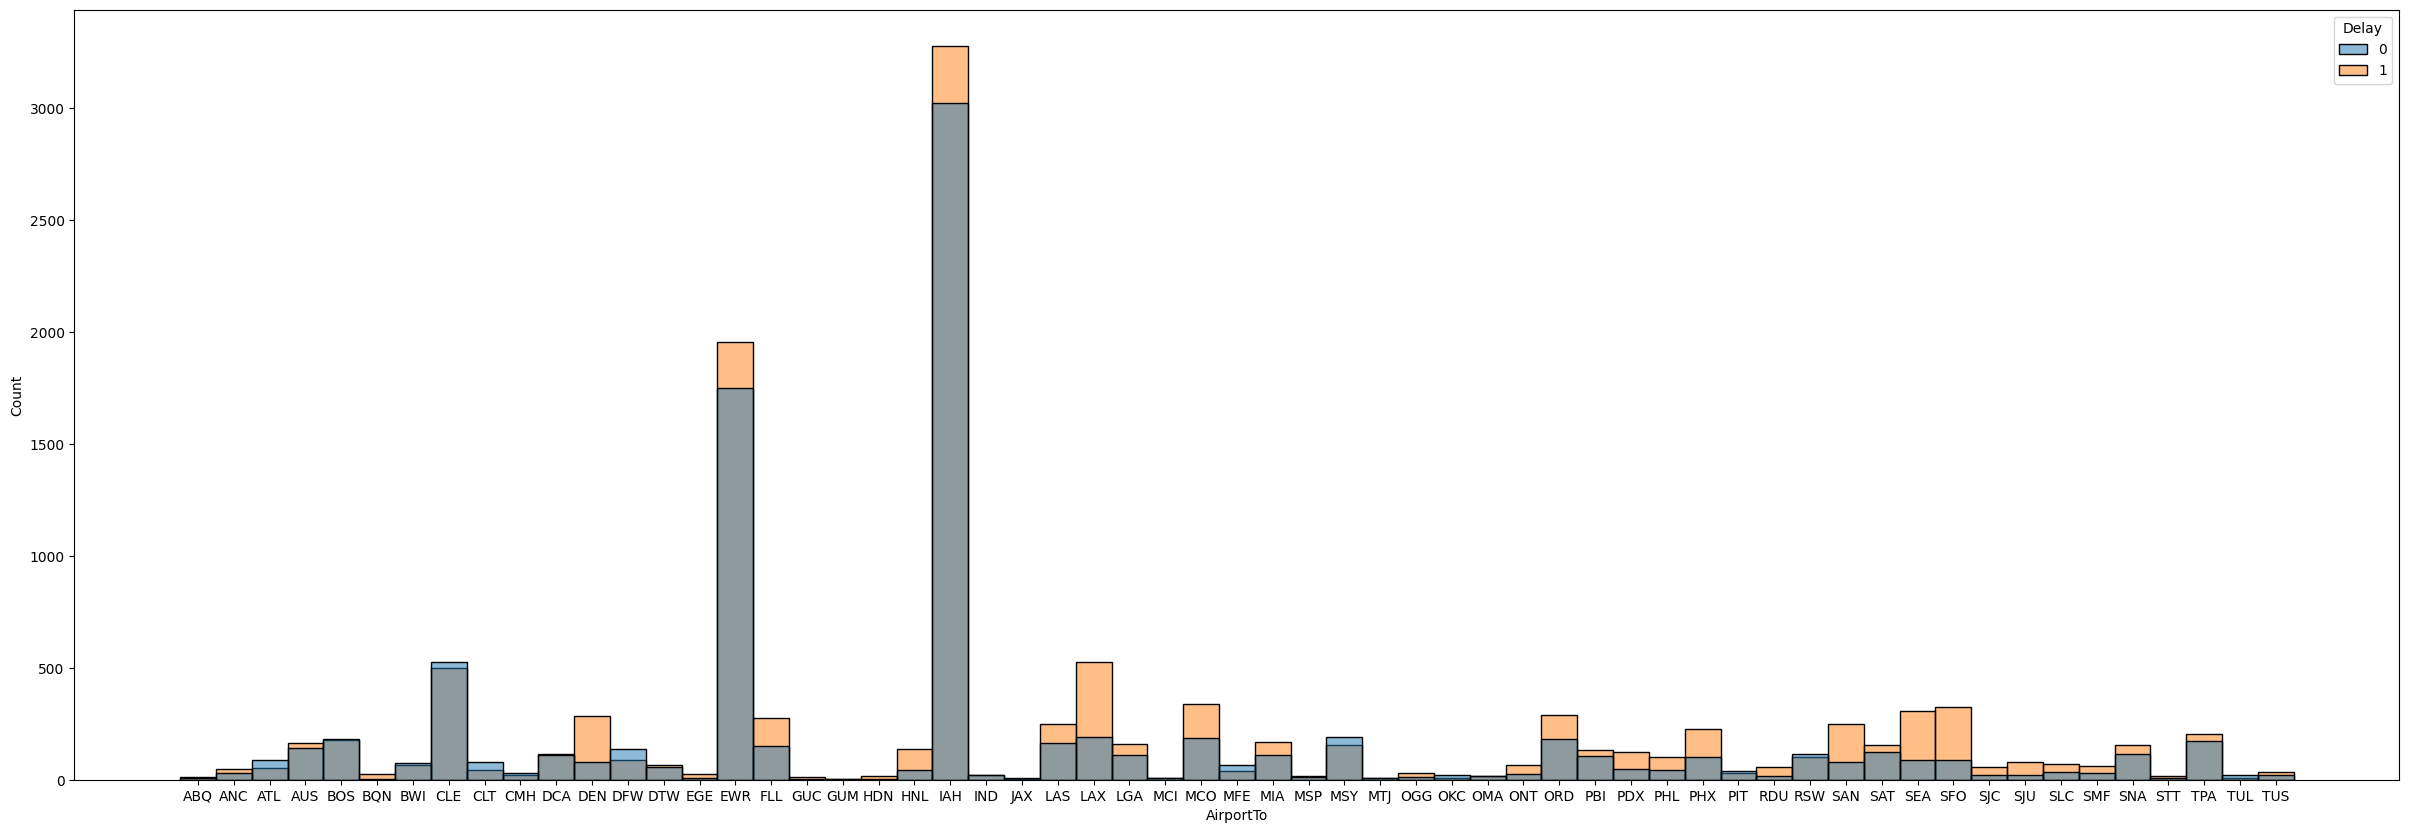

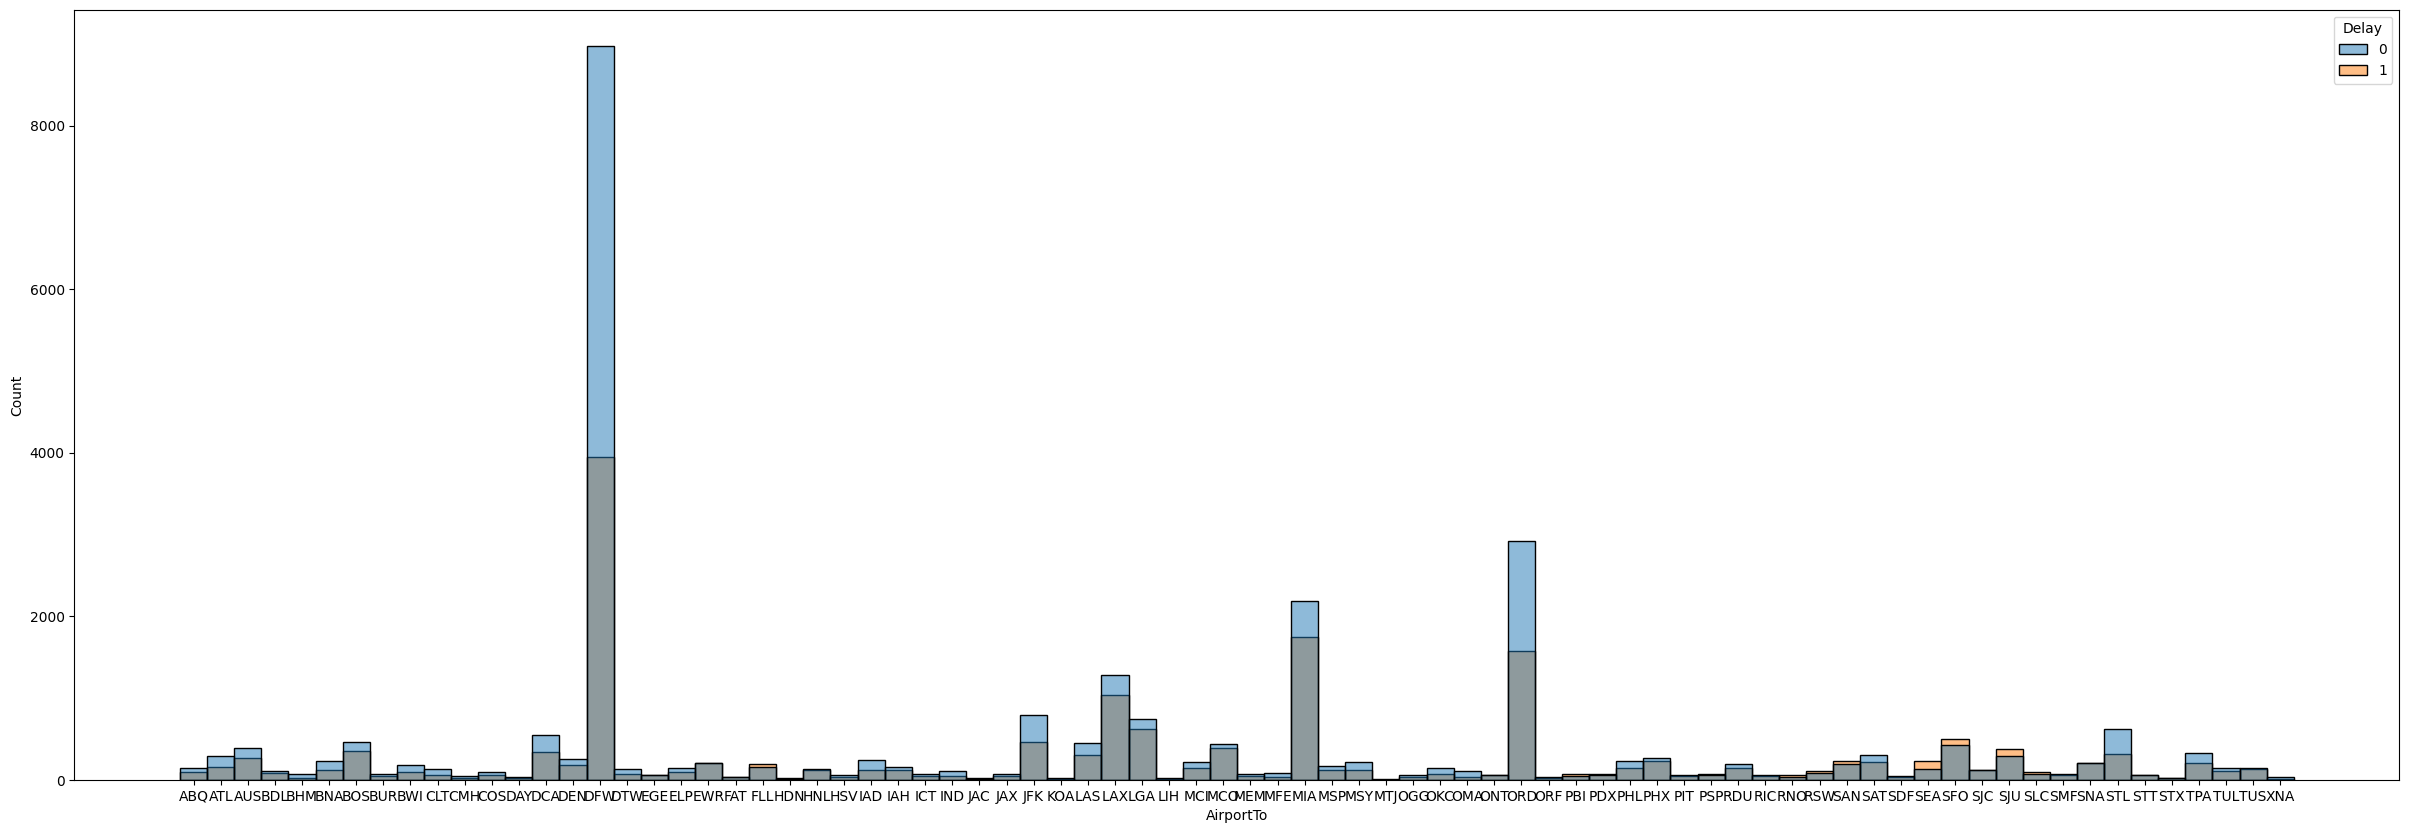

In [18]:
#Plot histograms to find correlation Delays and the combination of Airline and Airports.
flights_CO = pd.DataFrame(flights[flights['Airline']=='CO'])
plt.figure(figsize=(30,10))
sns.histplot(x='AirportFrom',data=flights_CO.sort_values('AirportFrom'), hue='Delay')
plt.show()

flights_AA = pd.DataFrame(flights[flights['Airline']=='AA'])
plt.figure(figsize=(30,10))
sns.histplot(x='AirportFrom',data=flights_AA.sort_values('AirportFrom'), hue='Delay')
plt.show()

plt.figure(figsize=(30,10))
sns.histplot(x='AirportTo',data=flights_CO.sort_values('AirportTo'), hue='Delay')
plt.show()

plt.figure(figsize=(30,10))
sns.histplot(x='AirportTo',data=flights_AA.sort_values('AirportTo'), hue='Delay')
plt.show()

# Data Preparation

In [19]:
#Import Libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [20]:
#Splitting numerical and categorical columns
num_cols = flights.select_dtypes(include='number').columns.to_list()
cat_cols = flights.select_dtypes(exclude='number').columns.to_list()

#Removing Delay from prepreocessing.
num_cols.remove("Delay")

#Scaling for numerical data and Encoding for Categorical data.
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OneHotEncoder())

preprocessing = ColumnTransformer([('num', num_pipeline, num_cols),
                                   ('cat', cat_pipeline, cat_cols)],
                                   remainder='passthrough')

In [21]:
num_cols

['Flight', 'DayOfWeek', 'Time', 'Length']

In [22]:
cat_cols

['Airline', 'AirportFrom', 'AirportTo']

In [23]:
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['Flight', 'DayOfWeek', 'Time', 'Length']),
                                ('cat',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['Airline', 'AirportFrom', 'AirportTo'])])

In [24]:

# Apply the preprocessing pipeline on the dataset

flights_prepared = preprocessing.fit_transform(flights)
flights_prepared_dense = flights_prepared.toarray()

feature_names=preprocessing.get_feature_names_out()
flights_prepared= pd.DataFrame(flights_prepared_dense, columns=feature_names)

flights_prepared

random_index = flights_prepared.sample(n=1).index

# Dropping random row in order to evaluate for ROC Curve later on.
flights_prepared.drop(random_index, inplace=True)



In [25]:
flights_prepared.shape

(539382, 609)

In [26]:
flights_prepared.columns

Index(['num__Flight', 'num__DayOfWeek', 'num__Time', 'num__Length',
       'cat__Airline_9E', 'cat__Airline_AA', 'cat__Airline_AS',
       'cat__Airline_B6', 'cat__Airline_CO', 'cat__Airline_DL',
       ...
       'cat__AirportTo_TYR', 'cat__AirportTo_TYS', 'cat__AirportTo_UTM',
       'cat__AirportTo_VLD', 'cat__AirportTo_VPS', 'cat__AirportTo_WRG',
       'cat__AirportTo_XNA', 'cat__AirportTo_YAK', 'cat__AirportTo_YUM',
       'remainder__Delay'],
      dtype='object', length=609)

# Model Selection


In [27]:
from sklearn.model_selection import train_test_split

X = flights_prepared.drop(["remainder__Delay"], axis=1)
y = flights_prepared["remainder__Delay"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(269691, 608) (269691,) (269691, 608) (269691,)


In [28]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, cross_val_score

              precision    recall  f1-score   support

         0.0       0.63      0.80      0.71      5584
         1.0       0.62      0.40      0.49      4416

    accuracy                           0.63     10000
   macro avg       0.62      0.60      0.60     10000
weighted avg       0.62      0.63      0.61     10000

Cross-Validation Mean Accuracy: 0.6270999999999999
ROC AUC Score: 0.5061464542542585


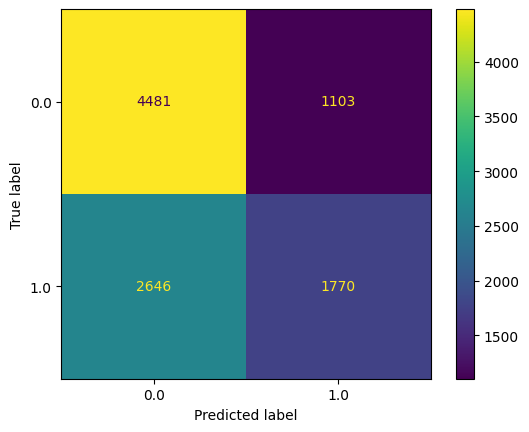

In [29]:
svm = SVC(kernel='rbf', gamma=1)
svm.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel())
s_prediction = svm.predict(X_test.iloc[:10000])
s_scores = cross_val_score(svm, X_train.iloc[:10000], y_train.iloc[:10000].values.ravel(), cv=5, scoring="accuracy")
print(classification_report(y_test.iloc[:10000], s_prediction))
print(ConfusionMatrixDisplay.from_predictions(y_test.iloc[:10000], s_prediction))
print(f'Cross-Validation Mean Accuracy: {s_scores.mean()}')
print(f'ROC AUC Score: {roc_auc_score(y_train.iloc[:10000].values.ravel(), s_prediction)}')

              precision    recall  f1-score   support

         0.0       0.67      0.22      0.33    149722
         1.0       0.47      0.86      0.61    119969

    accuracy                           0.51    269691
   macro avg       0.57      0.54      0.47    269691
weighted avg       0.58      0.51      0.45    269691

Cross-Validation Mean Accuracy: 0.5058233318746469
ROC AUC Score: 0.4994813769872853


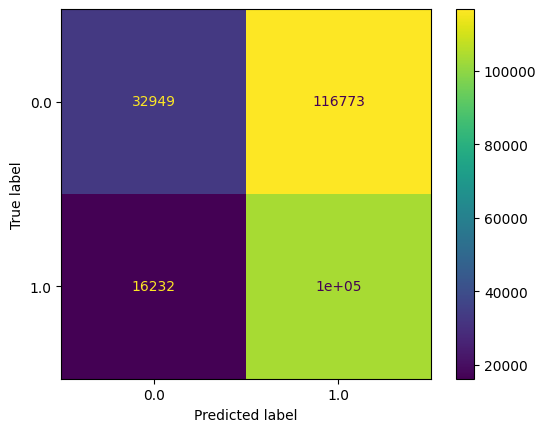

In [30]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
g_prediction = gaussian.predict(X_test)
g_scores = cross_val_score(gaussian, X_train, y_train, cv=5, scoring="accuracy")
print(classification_report(y_test, g_prediction))
print(ConfusionMatrixDisplay.from_predictions(y_test, g_prediction))
print(f'Cross-Validation Mean Accuracy: {g_scores.mean()}')
print(f'ROC AUC Score: {roc_auc_score(y_train, g_prediction)}')

              precision    recall  f1-score   support

         0.0       0.63      0.70      0.66    149722
         1.0       0.57      0.49      0.53    119969

    accuracy                           0.61    269691
   macro avg       0.60      0.60      0.60    269691
weighted avg       0.60      0.61      0.60    269691

Cross-Validation Mean Accuracy: 0.6027898641036044
ROC AUC Score: 0.5002511549535689


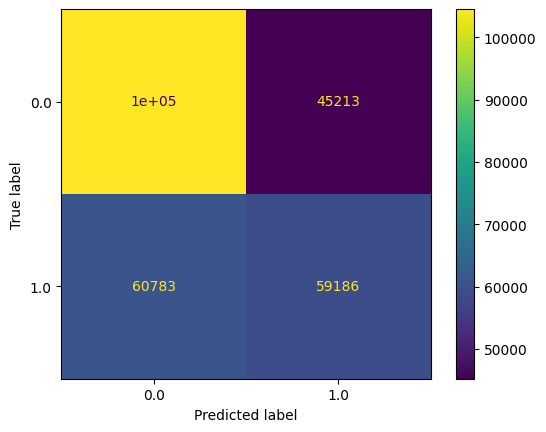

In [31]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
t_prediction=tree.predict(X_test)
t_scores = cross_val_score(tree, X_train, y_train, cv=5, scoring="accuracy")
print(classification_report(y_test, t_prediction))
print(ConfusionMatrixDisplay.from_predictions(y_test, t_prediction))
print(f'Cross-Validation Mean Accuracy: {t_scores.mean()}')
print(f'ROC AUC Score: {roc_auc_score(y_train, t_prediction)}')

# Fine-Tuning


Trying Ensemble of DecisionTreeClassifier

              precision    recall  f1-score   support

         0.0       0.65      0.67      0.66    149722
         1.0       0.58      0.56      0.57    119969

    accuracy                           0.62    269691
   macro avg       0.61      0.61      0.61    269691
weighted avg       0.62      0.62      0.62    269691

Cross-Validation Mean Accuracy: 0.6024190675919178
ROC AUC Score: 0.5000090494634525


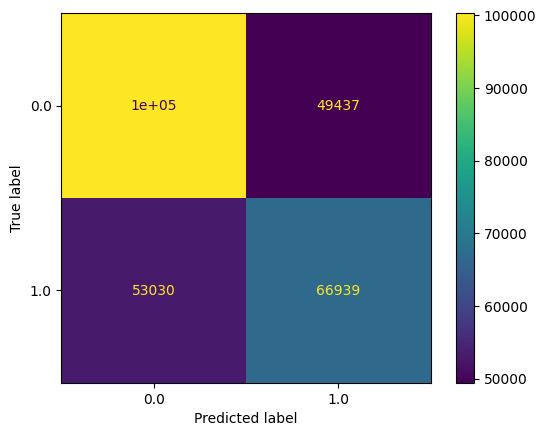

In [32]:
forest = RandomForestClassifier()
forest.fit(X_train,y_train)
f_prediction=forest.predict(X_test)
f_scores = cross_val_score(tree, X_train, y_train, cv=5, scoring="accuracy")
print(classification_report(y_test, f_prediction))
print(ConfusionMatrixDisplay.from_predictions(y_test, f_prediction))
print(f'Cross-Validation Mean Accuracy: {f_scores.mean()}')
print(f'ROC AUC Score: {roc_auc_score(y_train, f_prediction)}')

In [33]:
#Dropping additional numerical attributes that have low correlation. Trials showed minor improvements.
X = flights_prepared.drop(['remainder__Delay','num__Flight', 'num__DayOfWeek'], axis=1)

In [34]:
#Cross validation and hyperparameter search with GridSearchCV for DecisionTreeClassifier

X_train, X_validation_test, y_train, y_validation_test = train_test_split(X, y, test_size=0.4, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_validation_test, y_validation_test, test_size=0.5, random_state=42)


param = {'criterion':['gini','entropy'],'min_samples_split':[2,5,10], 'max_depth':[None,2,8,12,20],'min_samples_leaf':[1,10]}
tree_gsv = GridSearchCV(estimator = tree, param_grid = param, cv=5)
tree_gsv.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel())
tree_winner = tree_gsv.best_estimator_
tree_winner.score(X_validation, y_validation)

0.628805294968297

In [35]:
tree_winner

DecisionTreeClassifier(max_depth=8, min_samples_split=10)

In [36]:
#Cross validation and hyperparameter search with GridSearchCV for RandomForestClassifier

param = {
    'max_depth': [20,100],
    'min_samples_split': [2,5],
    'min_samples_leaf': [10,30,50],
}
forest_gsv = GridSearchCV(estimator = forest, param_grid = param, cv=5)
forest_gsv.fit(X_train.iloc[:10000], y_train.iloc[:10000].values.ravel())
forest_winner = forest_gsv.best_estimator_
forest_winner.score(X_validation, y_validation)

0.6349790500203938

In [37]:
forest_winner

RandomForestClassifier(max_depth=100, min_samples_leaf=10, min_samples_split=5)

              precision    recall  f1-score   support

         0.0       0.66      0.81      0.73     59734
         1.0       0.67      0.49      0.57     48143

    accuracy                           0.67    107877
   macro avg       0.67      0.65      0.65    107877
weighted avg       0.67      0.67      0.66    107877

Cross-Validation Mean Accuracy: 0.6558927474768542


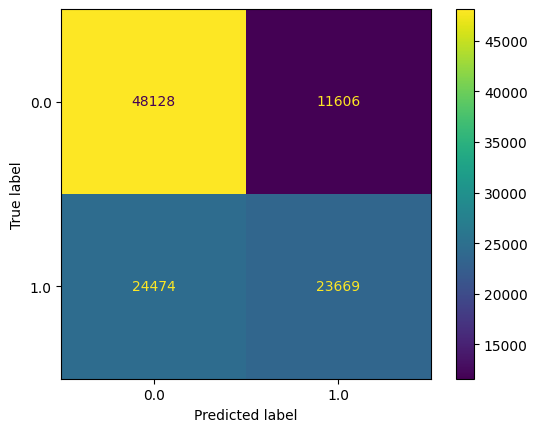

In [38]:
#Training RandomForestClassifier on the best hyperparameters with a 80/20 split and getting detailed metrics.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
forest = RandomForestClassifier(max_depth=100, min_samples_leaf=10, min_samples_split=5)
forest.fit(X_train,y_train)
f_prediction=forest.predict(X_test)
f_scores = cross_val_score(tree, X_train, y_train, cv=5, scoring="accuracy")
print(classification_report(y_test, f_prediction))
print(ConfusionMatrixDisplay.from_predictions(y_test, f_prediction))
print(f'Cross-Validation Mean Accuracy: {f_scores.mean()}')

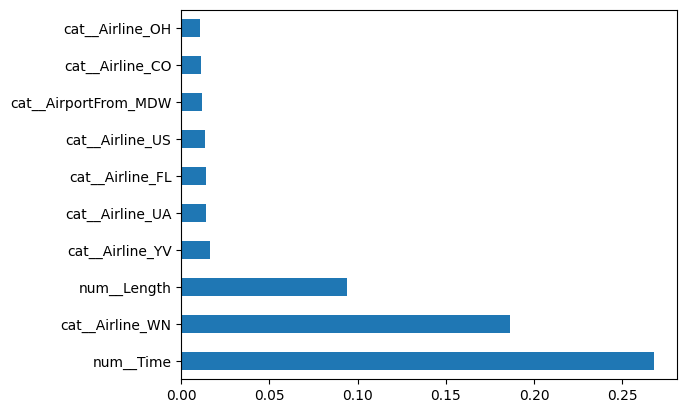

In [39]:
#Feature importance graph to gain insight.

feat_importances = pd.Series(forest.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

              precision    recall  f1-score   support

         0.0       0.56      1.00      0.72     59734
         1.0       0.83      0.03      0.06     48143

    accuracy                           0.56    107877
   macro avg       0.70      0.51      0.39    107877
weighted avg       0.68      0.56      0.42    107877

Cross-Validation Mean Accuracy: 0.6558695727743594


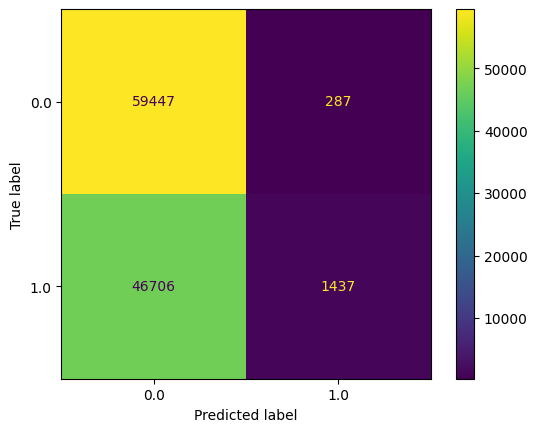

In [40]:
#Low depth Forest in order to create a tree graph to gain insight.

forest = RandomForestClassifier(max_depth=3, min_samples_leaf=2, min_samples_split=2)
forest.fit(X_train,y_train)
f_prediction=forest.predict(X_test)
f_scores = cross_val_score(tree, X_train, y_train, cv=5, scoring="accuracy")
print(classification_report(y_test, f_prediction))
print(ConfusionMatrixDisplay.from_predictions(y_test, f_prediction))
print(f'Cross-Validation Mean Accuracy: {f_scores.mean()}')

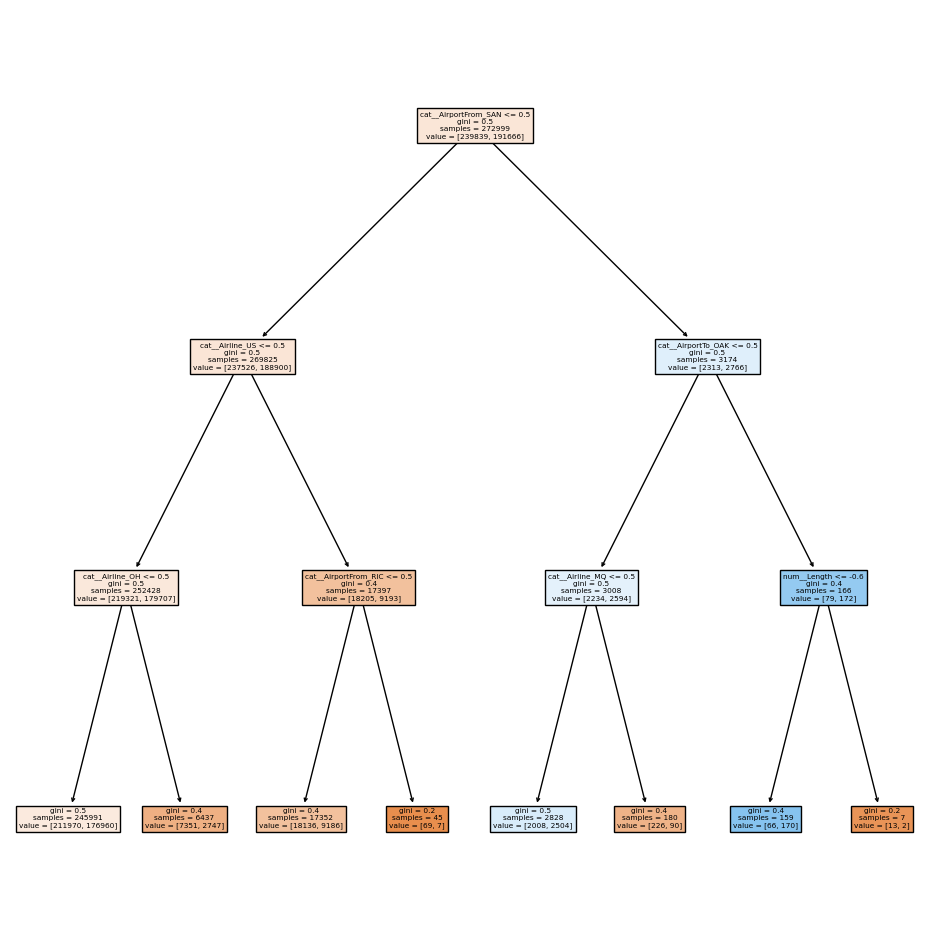

In [41]:
#Plotting the second estimator tree (arbitrarily chosen) of the RandomForestClassifier

from sklearn.tree import plot_tree

tree = forest.estimators_[1]
fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(tree, feature_names=X_train.columns, filled=True, precision=1, ax=ax)
plt.show()